HM2
Jiahang Guo  
Zhengyi Qin 
Qian Liu

1.Price a 1-year European call option with S0=K=100,assuming no dividend and the risk-free interest is 3% and the underlying volatility is 30%.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

def Binomial(n, S, K, r, v, t, PutCall):  
    At = t/n 
    u = np.exp(v*np.sqrt(At))
    d = 1./u
    p = (np.exp(r*At)-d) / (u-d) 

    #Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d
    
    #option value at final node   
    optionvalue = np.zeros((n+1,n+1))
    for j in range(n+1):
        if PutCall=="C": # Call
            optionvalue[n,j] = max(0, stockvalue[n,j]-K)
        elif PutCall=="P": #Put
            optionvalue[n,j] = max(0, K-stockvalue[n,j])
    
    #backward calculation for option price   
    '''
    for j in range(n+1): 
        optionvalue[0,0] += np.exp(-r) * (m.comb(n,j)) * p**(j)*(1-p)**(n-j)*optionvalue[n,n-j]
    return optionvalue[0,0]
    '''
    for i in range(n-1,-1,-1):
        for j in range(i+1):
                    optionvalue[i,j] = np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1])
    return optionvalue[0,0]
                
    # Inputs
n = 100 #input("Enter number of binomial steps: ")           #number of steps
S = 100 #input("Enter the initial underlying asset price: ") #initial underlying asset price
r = 0.03 #input("Enter the risk-free interest rate: ")        #risk-free interest rate
K = 100 #input("Enter the option strike price: ")            #strike price
v = 0.3 #input("Enter the volatility factor: ")              #volatility
t = 1.

    #Graphs and results for the Option prices



print("European Call Price: %s" %(Binomial(n, S, K, r, v, t, PutCall="C")))


print("European Put Price: %s"%(Binomial(n, S, K, r, v, t, PutCall="P")))

European Call Price: 13.253838123630667
European Put Price: 10.298391478481683


In [10]:
import matplotlib.pyplot as plt

2. Pick the number of steps in the tree and examine how the calculated option prices change.

Text(0.5, 1.0, 'call option')

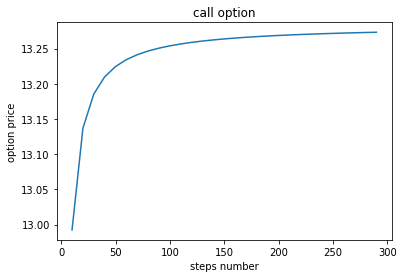

In [13]:
call_options = []
for n in range(10,300,10):
    call = Binomial(n, S, K, r, v, t, PutCall="C")
    call_options.append(call)
call_options
plt.plot(range(10,300,10), call_options)
plt.xlabel("steps number")
plt.ylabel("option price")
plt.title('call option')

Text(0.5, 1.0, 'put option')

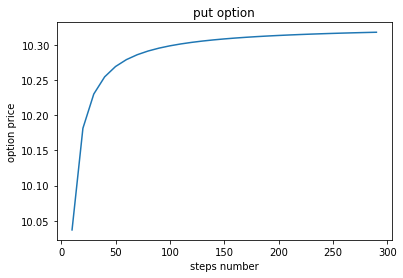

In [14]:
put_options = []
for n in range(10,300,10):
    put = Binomial(n, S, K, r, v, t, PutCall="P")
    put_options.append(put)
put_options
plt.plot(range(10,300,10), put_options)
plt.xlabel("steps number")
plt.ylabel("option price")
plt.title('put option')

3. plot the terminal stock price distribution generated by the tree.Compute the hedge ratio and the B-S delta. Compare the hedge ratio implied by the tree an dsummarize the difference btw these two numbers at each node.

In [16]:
n = 300 #number of steps
S = 100 #initial underlying asset price
r = 0.03 #risk-free interest rate
K = 100 #strike price
v = 0.3 #volatility
t = 1.

At = t/n 
u = np.exp(v*np.sqrt(At))
d = 1./u
p = (np.exp(r*At)-d) / (u-d) 

#Binomial price tree
stockvalue = np.zeros((n+1,n+1))
stockvalue[0,0] = S
for i in range(1,n+1):
    stockvalue[i,0] = stockvalue[i-1,0]*u
    for j in range(1,i+1):
        stockvalue[i,j] = stockvalue[i-1,j-1]*d
    
#option value at final node
#call option
optionvaluecall = np.zeros((n+1,n+1))
for j in range(n+1):
    optionvaluecall[n,j] = max(0, stockvalue[n,j]-K)
#put option
optionvalueput = np.zeros((n+1,n+1))
for j in range(n+1):
    optionvalueput[n,j] = max(0, K-stockvalue[n,j])
#call option
for i in range(n-1,-1,-1):
    for j in range(i+1):
                optionvaluecall[i,j] = np.exp(-r*At)*(p*optionvaluecall[i+1,j]+(1-p)*optionvaluecall[i+1,j+1])

#put option
for i in range(n-1,-1,-1):
    for j in range(i+1):
                optionvalueput[i,j] = np.exp(-r*At)*(p*optionvalueput[i+1,j]+(1-p)*optionvalueput[i+1,j+1])

   

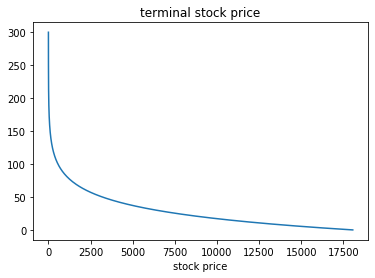

Text(0.5, 0, 'log stock price')

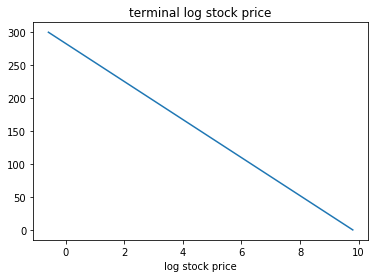

In [19]:
n=300
stockprice=[]
stockpricelog=[]
for i in range(n+1):
    stockprice.append(stockvalue[n,i])
    stockpricelog.append(np.log(stockvalue[n,i]))
plt.figure()
plt.plot(stockprice,range(301))
plt.title('terminal stock price')
plt.xlabel("stock price")
plt.show()
stockpricelog=np.log(stockprice)
plt.plot(stockpricelog,range(301))
plt.title('terminal log stock price')
plt.xlabel("log stock price")


In [23]:
#hedge ratio
#call option
stats.describe(call)
n=300
ratiocall=[[] for i in range(n)]
call=[]
for i in range(n):
    for j in range(i+1):
        hedge=(optionvaluecall[i+1,j]-optionvaluecall[i+1,j+1])/(stockvalue[i,j]*(u-d))
        ratiocall[i].append(hedge)
        call.append(hedge)
stats.describe(call)

DescribeResult(nobs=45150, minmax=(0.0, 1.0000000000000318), mean=0.5065706140085775, variance=0.22968332920890328, skewness=-0.027116839307432698, kurtosis=-1.9383458720479032)

In [22]:
#put option
ratioput=[[] for i in range(n)]
put=[]
for i in range(n):
    for j in range(i+1):
        hedge=(optionvalueput[i+1,j]-optionvalueput[i+1,j+1])/(stockvalue[i,j]*(u-d))
        ratioput[i].append(hedge)
        put.append(hedge)
stats.describe(put)

DescribeResult(nobs=45150, minmax=(-1.0000000000018823, 0.0), mean=-0.4934293859914323, variance=0.2296833292089033, skewness=-0.027116839307428867, kurtosis=-1.9383458720479034)

4. Use the same chosen tree to price the put option by changing the exercise style to american option.

In [4]:
#American option
def BinomialAm(n, S, K, r, v, t, PutCall):  
    At = t/n 
    u = np.exp(v*np.sqrt(At))
    d = 1./u
    p = (np.exp(r*At)-d) / (u-d) 

    #Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d
    
    #option value at final node   
    optionvalue = np.zeros((n+1,n+1))
    for j in range(n+1):
        if PutCall=="C": # Call
            optionvalue[n,j] = max(0, stockvalue[n,j]-K)
        elif PutCall=="P": #Put
            optionvalue[n,j] = max(0, K-stockvalue[n,j])
    
    #backward calculation for option price   
 
    for i in range(n-1,-1,-1):
        for j in range(i+1):
                if PutCall=="P":
                    optionvalue[i,j] = max(0, K-stockvalue[i,j], np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
                elif PutCall=="C":
                    optionvalue[i,j] = max(0, stockvalue[i,j]-K, np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
    return optionvalue[0,0]
   # Inputs
n = 100 #input("Enter number of binomial steps: ")           #number of steps
S = 100 #input("Enter the initial underlying asset price: ") #initial underlying asset price
r = 0.03 #input("Enter the risk-free interest rate: ")        #risk-free interest rate
K = 100 #input("Enter the option strike price: ")            #strike price
v = 0.3 #input("Enter the volatility factor: ")              #volatility
t = 1.

    #Graphs and results for the Option prices



print("American Call Price: %s" %(BinomialAm(n, S, K, r, v, t, PutCall="C")))


print("American Put Price: %s"%(BinomialAm(n, S, K, r, v, t, PutCall="P")))

American Call Price: 13.253838123630667
American Put Price: 10.59171157250753


We found that when using the same chosen tree, the call prices of European option and American option are the same, while the put price of American option is higher than the put price of European option

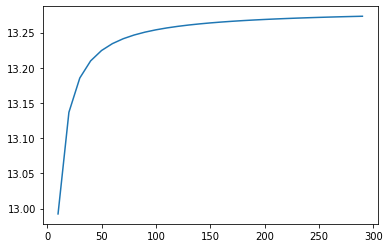

In [121]:
#call option
call_optionsAm= []
for n in range(10,300,10):
    call = BinomialAm(n, S, K, r, v, t, PutCall="C")
    call_optionsAm.append(call)
call_optionsAm
plt.plot(range(10,300,10), call_optionsAm)

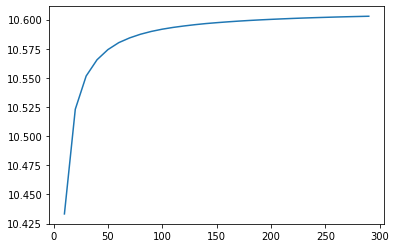

In [122]:
#put option
put_optionsAm = []
for n in range(10,300,10):
    put = BinomialAm(n, S, K, r, v, t, PutCall="P")
    put_optionsAm.append(put)
put_optionsAm
plt.plot(range(10,300,10), put_optionsAm)

By ploting the convergence process, we found that American option price and European option price are converge at the same step level

5. Use the longstaff schewartz method to price...

In [25]:
class AmericanOption(object):
    def __init__(self,putcall,S,k,T,N,r,v,simulation):
        self.simulation1=int(simulation/2)
        self.putcall=putcall
        self.S=float(S)
        self.k=float(k)
        self.T=float(T)
        self.N=int(N)
        self.r=float(r)
        self.v=float(v)
        self.simulation=int(simulation)
        self.dt=self.T/float(self.N)
        self.discount=np.exp(-self.r*self.dt)
    @property
    def price_martix(self,seed=123):#Monte Carlo price martix
        np.random.seed(seed)
        price_martix=np.zeros((self.N+1,self.simulation),dtype=np.float64)
        price_martix[0,:]=self.S
        for t in range(1,self.N+1):
            brownian=np.random.standard_normal(self.simulation1)
            brownian=np.concatenate((brownian,-brownian))
            price_martix[t,:]=(price_martix[t-1,:]*np.exp((self.r-self.v**2/2.)*self.dt+self.v*brownian*np.sqrt(self.dt)))
        return price_martix
    @property
    def payoff(self):
        if self.putcall=='call':
            payoff=np.maximum(self.price_martix-self.k,np.zeros((self.N+1,self.simulation),dtype=np.float64))
        else:
            payoff=np.maximum(self.k-self.price_martix,np.zeros((self.N+1,self.simulation),dtype=np.float64))
        return payoff
    @property
    def value(self):
        value_martix=np.zeros_like(self.payoff)
        value_martix[-1,:]=self.payoff[-1,:]
        for t in range(self.N-1,0,-1):
            regression=np.polyfit(self.price_martix[t,:],value_martix[t+1,:]*self.discount,3)
            continution_val=np.polyval(regression,self.price_martix[t,:])
            value_martix[t,:]=np.where(self.payoff[t,:]>continution_val,self.payoff[t,:],value_martix[t+1,:]*self.discount)
        return value_martix[1,:]*self.discount
    @property
    def price(self):
        return np.sum(self.value)/float(self.simulation)

In [26]:
AmericanPUT = AmericanOption('put', 100., 100., 1., 50, 0.03, 0.3, 100000)
print ('Put Price: ', AmericanPUT.price)
AmericanPUT = AmericanOption('call', 100., 100., 1., 50, 0.03, 0.3, 100000)
print ('Call Price: ', AmericanPUT.price)

Put Price:  10.32160172741628
Call Price:  12.731549058015025


In [ ]:
help(np.)